# GMM实例

In [3]:
import pandas as pd
data = pd.read_csv ('./data/data_fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


## Visualizing the Dataset

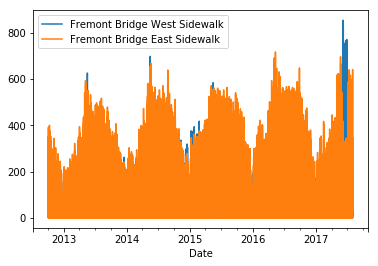

In [4]:
%matplotlib inline
data.plot();

数据重采样，按周进行计算

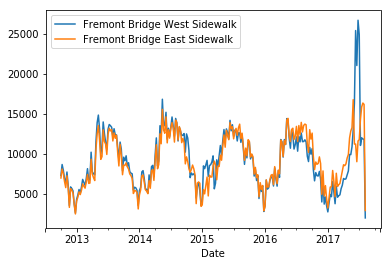

In [5]:
%matplotlib inline
data.resample('w').sum().plot();

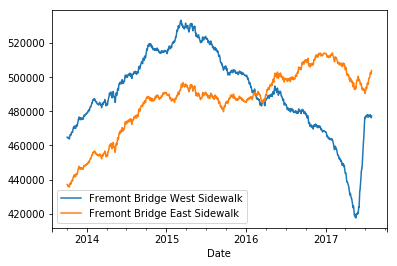

In [6]:
data.resample('D').sum().rolling(365).sum().plot();

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text xticklabel objects>)

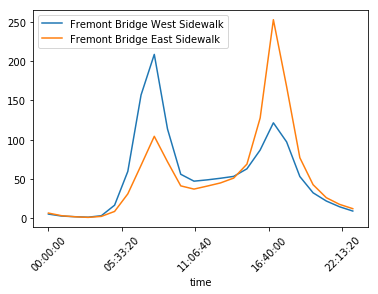

In [7]:
import matplotlib.pyplot as plt
data.groupby(data.index.time).mean().plot();
plt.xticks(rotation=45)

In [8]:
# pivot table
data.columns =['West', 'East']
data ['Total'] =data['West']+data['East']
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 7 Text xticklabel objects>)

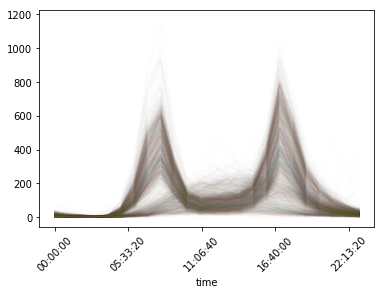

In [9]:
pivoted.plot(legend=False, alpha =0.01);
plt.xticks(rotation=45)

In [10]:
pivoted.shape

(24, 1763)

In [11]:
X = pivoted.fillna(0).T.values
X.shape

(1763, 24)

In [12]:
from  sklearn.decomposition import PCA
X2 = PCA(2).fit_transform(X)
X2.shape

(1763, 2)

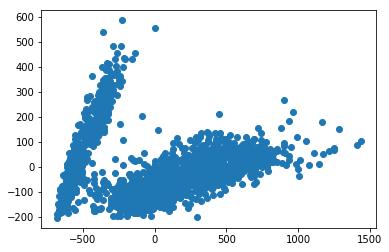

In [13]:
plt.scatter(X2[:,0],X2[:,1])

In [14]:
from sklearn.mixture import GaussianMixture
gmm =GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict_proba(X)
labels

array([[1.00000000e+000, 4.27200703e-157],
       [1.00000000e+000, 2.97606604e-125],
       [1.00000000e+000, 1.00461289e-101],
       ...,
       [2.50152395e-030, 1.00000000e+000],
       [2.49747986e-025, 1.00000000e+000],
       [1.00000000e+000, 1.79108465e-301]])

In [15]:
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 1, 1, 0])

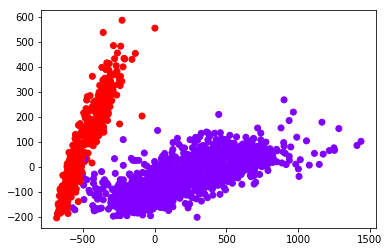

In [16]:
plt.scatter(X2[:,0],X2[:,1], c=labels, cmap='rainbow') 
#plt.colorbar()

Text(0.5,1,'Red Cluster')

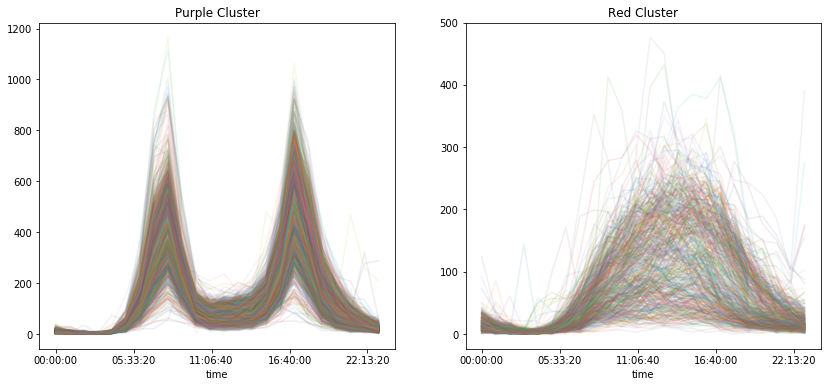

In [17]:
fig, ax = plt.subplots(1, 2, figsize =(14, 6))
                      
pivoted.T[labels == 0].T.plot(legend =False, alpha =0.1, ax=ax[0])
pivoted.T[labels == 1].T.plot(legend =False, alpha =0.1, ax=ax[1])

ax[0].set_title ('Purple Cluster')
ax[1].set_title ('Red Cluster')

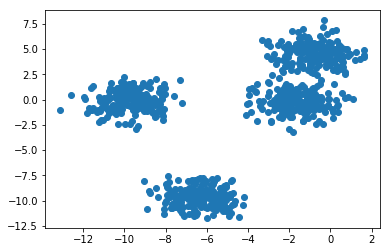

In [18]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=800, centers=4, random_state=11)
plt.scatter(X[:, 0], X[:, 1]);

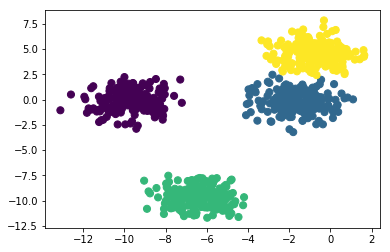

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

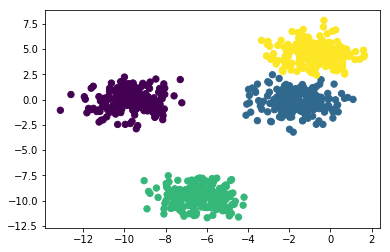

In [20]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

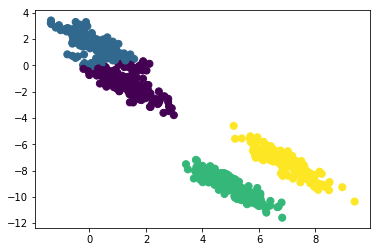

In [22]:
import numpy as np
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_stretched)
y_kmeans = kmeans.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_

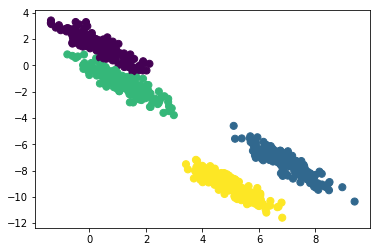

In [23]:
gmm = GaussianMixture(n_components=4)        
gmm.fit(X_stretched)
y_gmm = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=y_gmm, s=50, cmap='viridis')